In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from model import from_student_number_to_naca, add_zeros
from tqdm import tqdm as tqdm

from pathlib import Path

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Fixed geometry parametrization for both airfoils. 

In [43]:
NUM_POINTS_X = 50

In [44]:
ALPHA_0 = 0
ALPHA_N =  15
N = 5
ALPHAS = np.linspace(ALPHA_0, ALPHA_N, N)

### Create solver methods

In [45]:
ITERATIONS_MAX     = 1e4
ITERATIONS_RESTART = ITERATIONS_MAX
%run 2-Solver.ipynb

In [46]:
STUDENT_NUMBER = 

In [47]:
naca1, naca2 = from_student_number_to_naca(STUDENT_NUMBER)

13
False
True


In [48]:
print(f'1st NACA = {naca1}', f'2nd NACA = {naca2}', sep = '\n')

1st NACA = 0007
2nd NACA = 0014


## Solve for the first airfoil

### NACA-0007

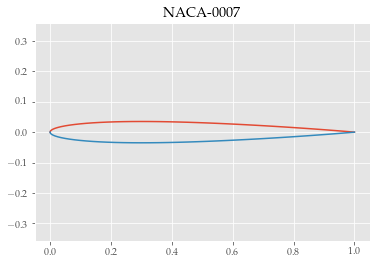

100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


In [49]:
NACA = naca1
%run 1-Geometry.ipynb

x_naca1, y_naca1 = x_c, y_c
normals_naca1    = normals

data_naca1_cp = []
data_naca1_cl = []

for alpha in tqdm(ALPHAS):
    
    _, cp, cl = solve(alpha)
    
    data_naca1_cp.append((alpha, cp))
    data_naca1_cl.append((alpha, cl))

### NACA-0014

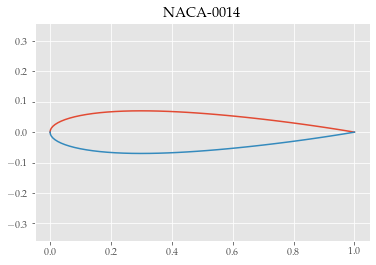

100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


In [50]:
NACA = naca2
%run 1-Geometry.ipynb

x_naca2, y_naca2 = x_c, y_c
normals_naca2    = normals

data_naca2_cp = []
data_naca2_cl = []

for alpha in tqdm(ALPHAS):
    
    _, cp, cl = solve(alpha)
    
    data_naca2_cp.append((alpha, cp))
    data_naca2_cl.append((alpha, cl))

## Lift comparison

In [51]:
cl_naca1_df = pd.DataFrame(data_naca1_cl, columns=['alpha', f'{naca1}-cl'])
cl_naca1_df = cl_naca1_df.set_index('alpha')

In [52]:
cl_naca2_df = pd.DataFrame(data_naca2_cl, columns=['alpha', f'{naca2}-cl'])
cl_naca2_df = cl_naca2_df.set_index('alpha')

In [53]:
cl_data_df = pd.DataFrame()

cl_data_df[f'{naca1}'] = cl_naca1_df[f'{naca1}-cl']

cl_data_df[f'{naca2}'] = cl_naca2_df[f'{naca2}-cl']

In [122]:
path_data = Path('../data/comparison_thickness')

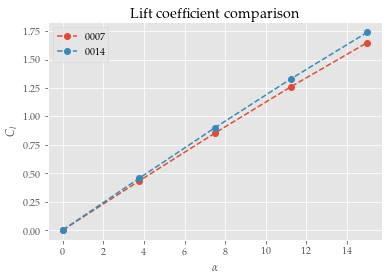

In [123]:
ax = cl_data_df.plot(linestyle = '--', marker = 'o')

ax.set(title  = f'Lift coefficient comparison', 
       xlabel = '$\\alpha$', 
       ylabel = '$C_l$')

plt.savefig(path_data / 'cl_comparison.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)

In [133]:
_cl_data_df = cl_data_df.copy()

_cl_data_df.index =np.round(_cl_data_df.index, 2)

print(_cl_data_df.round(5).to_latex())

\begin{tabular}{lrr}
\toprule
{} &     0007 &     0014 \\
alpha &          &          \\
\midrule
0.00  &  0.00000 &  0.00000 \\
3.75  &  0.43049 &  0.45413 \\
7.50  &  0.85361 &  0.90049 \\
11.25 &  1.26213 &  1.33144 \\
15.00 &  1.64905 &  1.73960 \\
\bottomrule
\end{tabular}



### Pressure distribution comparison

In [124]:
cp_naca1_df = pd.DataFrame(index = x_naca1)

for element in data_naca1_cp:
    
    alpha, cp = element
    
    cp_naca1_df[alpha] = pd.Series(cp, index = x_naca1)

In [125]:
cp_naca2_df = pd.DataFrame(index = x_naca2)

for element in data_naca2_cp:
    
    alpha, cp = element
    
    cp_naca2_df[alpha] = pd.Series(cp, index = x_naca2)

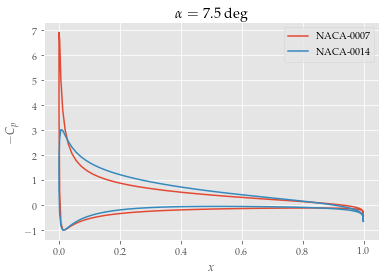

In [129]:
_alpha = ALPHAS[-3]
cp_naca1_df[_alpha].mul(-1).plot(label = f'NACA-{naca1}')
cp_naca2_df[_alpha].mul(-1).plot(label = f'NACA-{naca2}')
plt.legend()
plt.title(f'$\\alpha = {_alpha}$ deg')
plt.ylabel('$-C_p$')
plt.xlabel('$x$')
plt.savefig(path_data / 'cp_comparison.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)

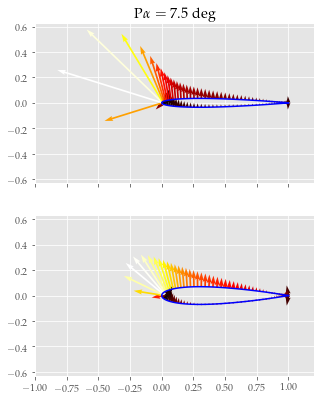

In [132]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize = (5, 6.5), sharex=True)

_alpha = ALPHAS[-3]

cp = cp_naca1_df[_alpha].values

_scale = 1e-6

axes[0].plot(x_naca1, y_naca1, c = 'b')
axes[0].quiver(x_naca1, 
           y_naca1, 
           -cp * normals_naca1[:,0], 
           -cp * normals_naca1[:,1], 
           -cp, cmap = 'hot',
          angles='xy', scale_units='xy', scale=8)
axes[0].axis('equal')
axes[0].set_title(f'P$\\alpha = {_alpha}$ deg')
axes[0].set_xlim([-1,1.2])

_alpha = ALPHAS[-3]

cp = cp_naca2_df[_alpha].values

_scale = 1e-6

axes[1].plot(x_naca2, y_naca2, c = 'b')
axes[1].quiver(x_naca2, 
           y_naca2, 
           -cp * normals_naca2[:,0], 
           -cp * normals_naca2[:,1], 
           -cp, cmap = 'hot',
          angles='xy', scale_units='xy', scale=8)
axes[1].axis('equal')
axes[1].set_xlim([-1,1.2])

plt.savefig(path_data / 'cp_comparison_normals.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)